In [3]:
import pandas as pd

## Importing DATA and Make a Copy of the Raw DATA

In [4]:
raw_data = pd.read_csv('index.csv')
df = raw_data.copy()
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


## Checking MetaData of The DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
df.duplicated().any()

False

In [7]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [9]:
df.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


## Dropping Unnecessary Columns(date columns)

In [10]:
df = df.drop('date',axis = 1)
df.head()

,datetime,cash_type,card,money,coffee_name
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Working with 'datetime' Column 

In [11]:
df['datetime'].head()

0    2024-03-01 10:15:50.520
1    2024-03-01 12:19:22.539
2    2024-03-01 12:20:18.089
3    2024-03-01 13:46:33.006
4    2024-03-01 13:48:14.626
Name: datetime, dtype: object

### Changing its Datatype (from object to datetime)

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].head()

0   2024-03-01 10:15:50.520
1   2024-03-01 12:19:22.539
2   2024-03-01 12:20:18.089
3   2024-03-01 13:46:33.006
4   2024-03-01 13:48:14.626
Name: datetime, dtype: datetime64[ns]

### Extracting Necessary Data From this column and add them to the dataset

#### Extracting Hour

In [13]:
#Extrac hour from datetime column
list = []
for i in range(df.shape[0]):
    list.append(df['datetime'][i].hour)
df['Hour'] = list
df.head()

,datetime,cash_type,card,money,coffee_name,Hour
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13


#### Extracting Month

In [14]:
#Extrac Months from datetime column
list = []
for i in range(0,df.shape[0]):
    list.append(df['datetime'][i].month)
df['Month'] = list
df.head()

,datetime,cash_type,card,money,coffee_name,Hour,Month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,3
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,3
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,3


#### Extracting Year

In [15]:
#Extrac years from datetime column
def date_to_year(date):
    return date.year

df['Year'] = df['datetime'].apply(date_to_year)
df.head()

,datetime,cash_type,card,money,coffee_name,Hour,Month,Year
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,3,2024
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,3,2024
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,3,2024


#### EXtracting day

In [16]:
df['day']=df['datetime'].dt.strftime('%w')
df.head()

,datetime,cash_type,card,money,coffee_name,Hour,Month,Year,day
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,3,2024,5
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024,5
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024,5
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,3,2024,5
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,3,2024,5


#### Extract Date

In [17]:
df['date'] = df['datetime'].dt.date
df.head()

,datetime,cash_type,card,money,coffee_name,Hour,Month,Year,day,date
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,3,2024,5,2024-03-01
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024,5,2024-03-01
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024,5,2024-03-01
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,3,2024,5,2024-03-01
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,3,2024,5,2024-03-01


#### Dropping datetime column

In [18]:
df =df.drop('datetime',axis = 1)
df.head()

,cash_type,card,money,coffee_name,Hour,Month,Year,day,date
0,card,ANON-0000-0000-0001,38.7,Latte,10,3,2024,5,2024-03-01
1,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024,5,2024-03-01
2,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,2024,5,2024-03-01
3,card,ANON-0000-0000-0003,28.9,Americano,13,3,2024,5,2024-03-01
4,card,ANON-0000-0000-0004,38.7,Latte,13,3,2024,5,2024-03-01


#### Organizig the columns

In [19]:
df.columns

Index(['cash_type', 'card', 'money', 'coffee_name', 'Hour', 'Month', 'Year',
       'day', 'date'],
      dtype='object')

In [20]:
organized_columns = ['date','Month', 'Year', 
        'day','Hour','coffee_name','cash_type', 'card', 'money',  ]
df = df[organized_columns]
df.head()

,date,Month,Year,day,Hour,coffee_name,cash_type,card,money
0,2024-03-01,3,2024,5,10,Latte,card,ANON-0000-0000-0001,38.7
1,2024-03-01,3,2024,5,12,Hot Chocolate,card,ANON-0000-0000-0002,38.7
2,2024-03-01,3,2024,5,12,Hot Chocolate,card,ANON-0000-0000-0002,38.7
3,2024-03-01,3,2024,5,13,Americano,card,ANON-0000-0000-0003,28.9
4,2024-03-01,3,2024,5,13,Latte,card,ANON-0000-0000-0004,38.7


# working with cash_type

In [21]:
df['cash_type'].value_counts()

cash_type
card    1044
cash      89
Name: count, dtype: int64

In [22]:
df['cash_type'].isnull().sum()

0

In [23]:
df['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

# working with card

In [24]:
df['card'].nunique()

446

In [25]:
df['card'].isnull().sum()

89

In [26]:
df[df['card'].isnull()].head()

,date,Month,Year,day,Hour,coffee_name,cash_type,card,money
12,2024-03-02,3,2024,6,10,Latte,cash,NaN,40.0
18,2024-03-03,3,2024,0,10,Latte,cash,NaN,40.0
41,2024-03-06,3,2024,3,12,Americano with Milk,cash,NaN,35.0
46,2024-03-07,3,2024,4,10,Latte,cash,NaN,40.0
49,2024-03-07,3,2024,4,11,Latte,cash,NaN,40.0


In [27]:
df['card'].mode()

0    ANON-0000-0000-0012
Name: card, dtype: object

### Filling the missing values with its mode

In [28]:
df['card'] = df['card'].fillna(df['card'].mode()[0])
df['card'].isnull().sum()

0

# working with money

In [29]:
df['money'].isnull().sum()

0

In [30]:
df.isnull().sum()

date           0
Month          0
Year           0
day            0
Hour           0
coffee_name    0
cash_type      0
card           0
money          0
dtype: int64

# working with coffee name

In [31]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [32]:
df['coffee_name'].isnull().sum()

0

### Count the Freequency of every datapoint in this column(in values)

In [33]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

### Count the Freequency of every datapoint in this column(in percent)

In [34]:
df['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100

coffee_name
Americano with Milk    23.65
Latte                  21.45
Cappuccino             17.30
Americano              14.92
Cortado                 8.74
Hot Chocolate           6.53
Espresso                4.32
Cocoa                   3.09
Name: proportion, dtype: float64

# Checkpoints

In [35]:
df_cleaed = df.copy()

In [36]:
df_cleaed.head()

,date,Month,Year,day,Hour,coffee_name,cash_type,card,money
0,2024-03-01,3,2024,5,10,Latte,card,ANON-0000-0000-0001,38.7
1,2024-03-01,3,2024,5,12,Hot Chocolate,card,ANON-0000-0000-0002,38.7
2,2024-03-01,3,2024,5,12,Hot Chocolate,card,ANON-0000-0000-0002,38.7
3,2024-03-01,3,2024,5,13,Americano,card,ANON-0000-0000-0003,28.9
4,2024-03-01,3,2024,5,13,Latte,card,ANON-0000-0000-0004,38.7


In [37]:
df_cleaed.to_csv('coffee_sell_cleaned_data.csv', index=False)


In [38]:
df.dtypes

date            object
Month            int64
Year             int64
day             object
Hour             int64
coffee_name     object
cash_type       object
card            object
money          float64
dtype: object

# EDA 

## Revenue By Product(coffee)

In [39]:
#revenue by coffe
revenue = df_cleaed.groupby(['coffee_name']).sum(['money']).reset_index().sort_values('money',ascending = False)
revenue = revenue.loc[:,['coffee_name','money']]
revenue

,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Revenue')

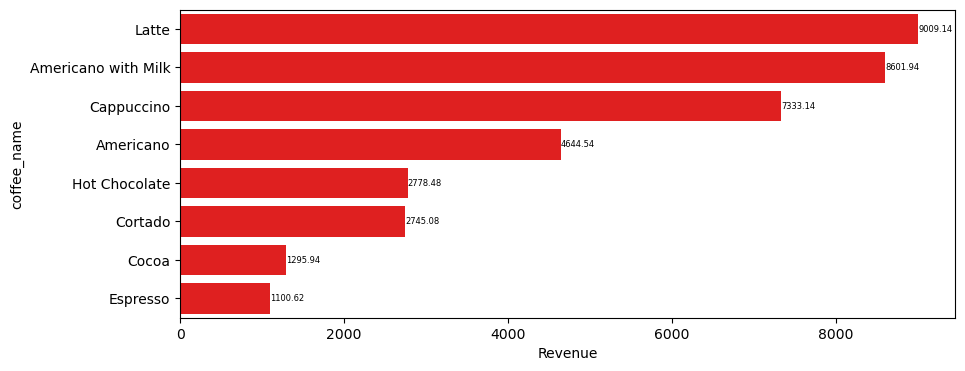

In [41]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue,x='money',y='coffee_name',color='red')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

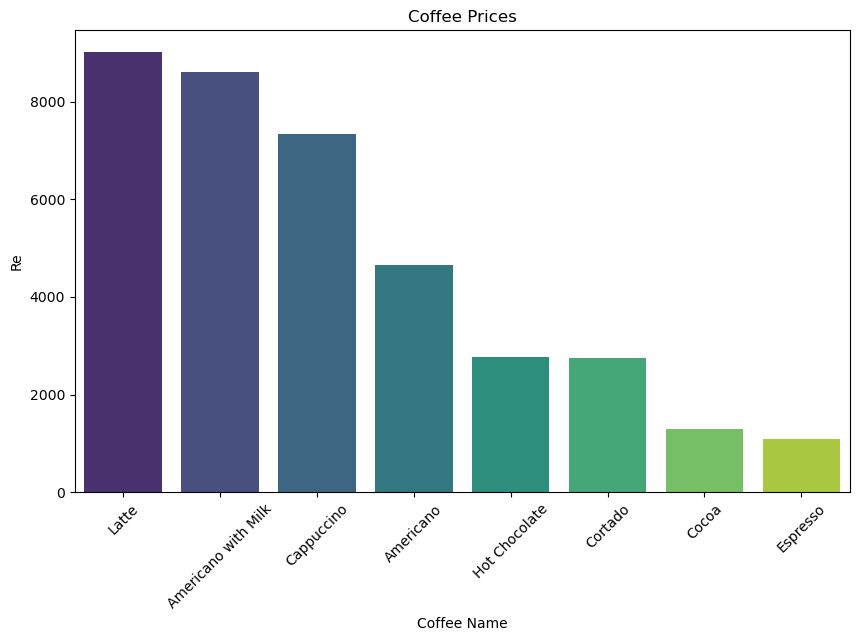

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='coffee_name', y='money', data=revenue, palette='viridis',hue = 'coffee_name')
plt.xlabel('Coffee Name')
plt.ylabel('Re')
plt.title('Coffee Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [43]:
df_cleaed.head()

,date,Month,Year,day,Hour,coffee_name,cash_type,card,money
0,2024-03-01,3,2024,5,10,Latte,card,ANON-0000-0000-0001,38.7
1,2024-03-01,3,2024,5,12,Hot Chocolate,card,ANON-0000-0000-0002,38.7
2,2024-03-01,3,2024,5,12,Hot Chocolate,card,ANON-0000-0000-0002,38.7
3,2024-03-01,3,2024,5,13,Americano,card,ANON-0000-0000-0003,28.9
4,2024-03-01,3,2024,5,13,Latte,card,ANON-0000-0000-0004,38.7


## Generate Monthly Sales broken by Coffee_name¶

In [44]:
#grouping the data according to coffe_name and then Month
a = df_cleaed.groupby(['coffee_name', 'Month']).count()['date'].reset_index()   
print('step:1:Grouping the dataset according to Coffe_name and month \n',a.head(3))

# Step 2: Count occurrences for each group based on 'date' column
# Rename a column
a = a.rename(columns={'date': 'Count of occurance'})
print('step:2:Rename the Date column to "Count of occurance" \n',a.head(3))

#pivot the dataset
a = a.pivot(index = 'Month',columns= 'coffee_name',values = 'Count of occurance')
print('step:3:Making a pivot table\n',a.head(3))
print('\n')

#reset the index
Monthly_sales= a.reset_index()
Monthly_sales

step:1:Grouping the dataset according to Coffe_name and month 
   coffee_name  Month  date
0   Americano      3    36
1   Americano      4    35
2   Americano      5    48
step:2:Rename the Date column to "Count of occurance" 
   coffee_name  Month  Count of occurance
0   Americano      3                  36
1   Americano      4                  35
2   Americano      5                  48
step:3:Making a pivot table
 coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
Month                                                                     
3                   36                   34          20      6       30   
4                   35                   42          43      6       19   
5                   48                   58          55      9       17   

coffee_name  Espresso  Hot Chocolate  Latte  
Month                                        
3                  10             22     48  
4                   7             13     31  
5                  

coffee_name,Month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


#### Generate monthly sales Monthly_Sales broken by Coffee_name¶ with one line of code

In [45]:
monthly_sales = (
    df_cleaed
    .groupby(['coffee_name', 'Month'])                # Step 1: Group by coffee_name and month
    .count()['date']                                  # Step 2: Count occurrences for each group based on 'date' column
    .reset_index()                                    # Step 3: Convert grouped data back to DataFrame
    .rename(columns={'date': 'Count of occurance'})                # Step 4: Rename 'date' column to 'count'
    .pivot(index='Month', columns='coffee_name', values='Count of occurance')  # Step 5: Pivot to make coffee types columns
    .reset_index()                                    # Step 6: Reset index to make 'month' a column again
)
monthly_sales.head(5)

coffee_name,Month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


#### Create Line Chart For Monthly_Sales broken by Coffee_name

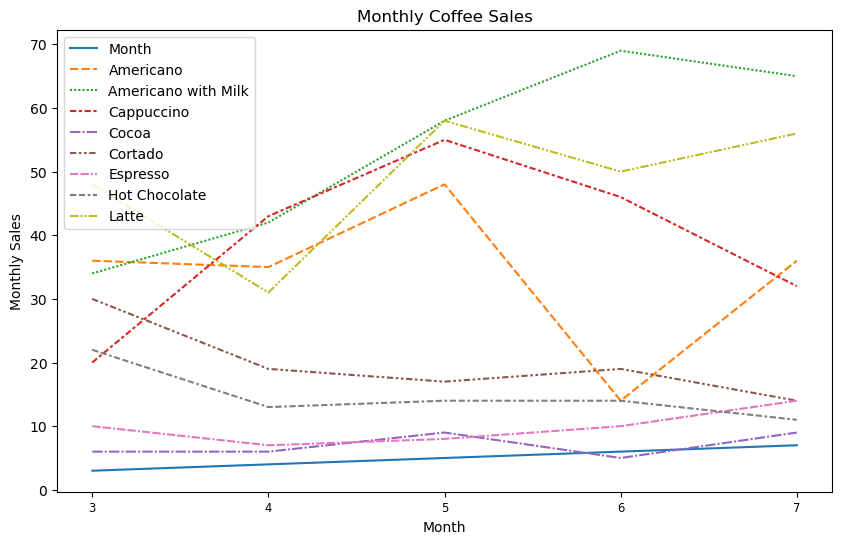

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(data=Monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(Monthly_sales['Month'])),Monthly_sales['Month'],size='small')

plt.title('Monthly Coffee Sales')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')

plt.show()

## Generate Nit Monthly Sales 

In [47]:
Nit_monthly_sales = (
    df_cleaed
    .groupby('Month')
    .count()['date']
    .reset_index()
    .rename(columns = {'date':'Nit Monthly Sales'})
)
Nit_monthly_sales

,Month,Nit Monthly Sales
0,3,206
1,4,196
2,5,267
3,6,227
4,7,237


## A bar chart for Nit monthly Sales

Text(0, 0.5, 'Monthly Sales')

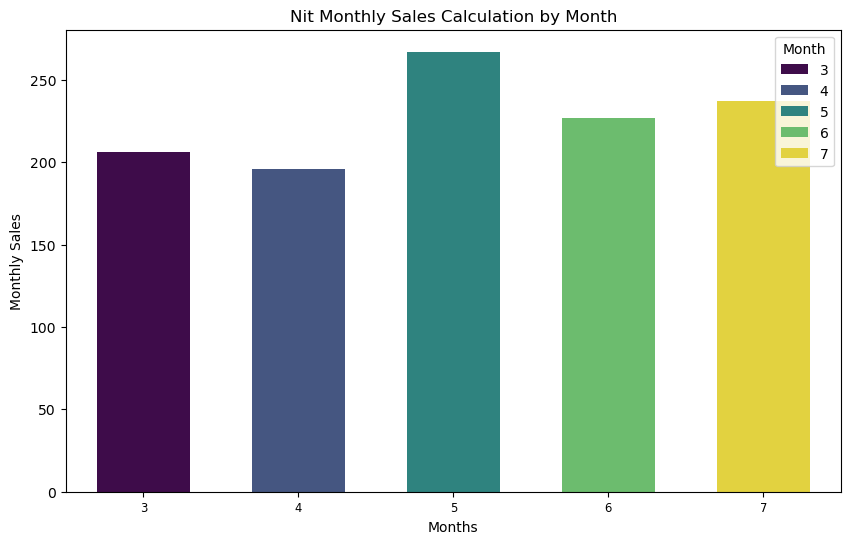

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data = Nit_monthly_sales, x = 'Month', y = 'Nit Monthly Sales', palette = 'viridis', hue = 'Month',width = 0.6)
plt.xticks(range(len(Nit_monthly_sales['Month'])),Nit_monthly_sales['Month'],size = 'small')
plt.title('Nit Monthly Sales Calculation by Month')
plt.xlabel('Months')
plt.ylabel('Monthly Sales')

## Generate Weekly Sales broken by Coffee_name¶

In [53]:
Weekly_sales =(
    df_cleaed
    .groupby(['coffee_name','day'])
    .count()['date']
    .reset_index()
    .rename(columns= {'date':'Sales Per Day'})
    .pivot(index = 'day',columns = 'coffee_name',values = 'Sales Per Day')
    .reset_index()
)
Weekly_sales

coffee_name,day,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,0,17,34,28,3,14,8,14,33
1,1,37,32,31,3,11,4,5,28
2,2,26,54,27,9,18,3,15,33
3,3,23,35,29,6,18,13,8,33
4,4,24,31,27,1,14,9,12,46
5,5,25,34,23,7,16,8,13,37
6,6,17,48,31,6,8,4,7,33


## A Line Chart for Weekly Sales broken by Coffee_name¶

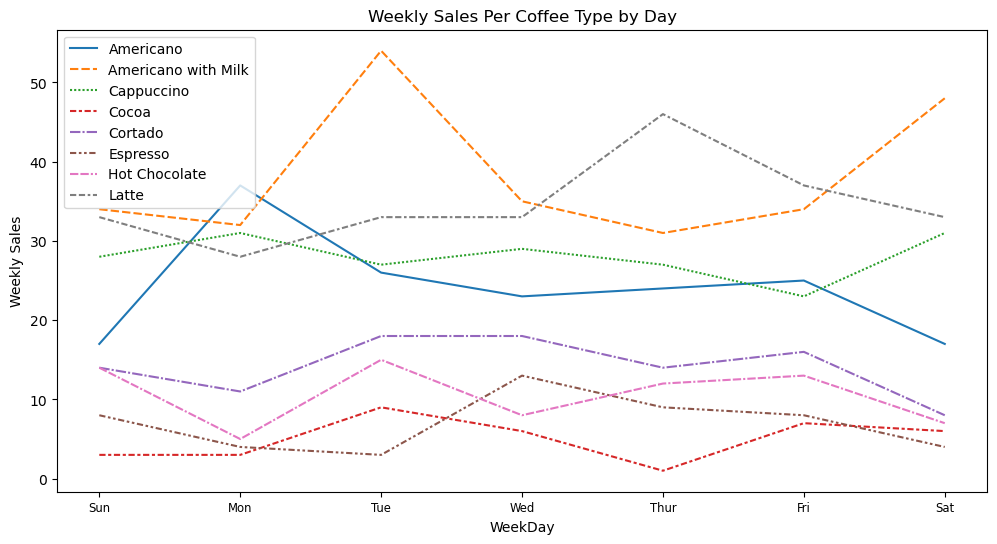

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Weekly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(Weekly_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

plt.title('Weekly Sales Per Coffee Type by Day')
plt.xlabel('WeekDay')
plt.ylabel('Weekly Sales')

plt.show()

## Nit Weekly Sales Calculation by Day

In [56]:
weekly_total_sales = df_cleaed.groupby('day').count()['date'].reset_index().rename(columns= {'date':'Nit Sales Per Day'})
weekly_total_sales

,day,Nit Sales Per Day
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


## A Bar Chart for Nit Weekly Sales

Text(0, 0.5, 'Daily Sales')

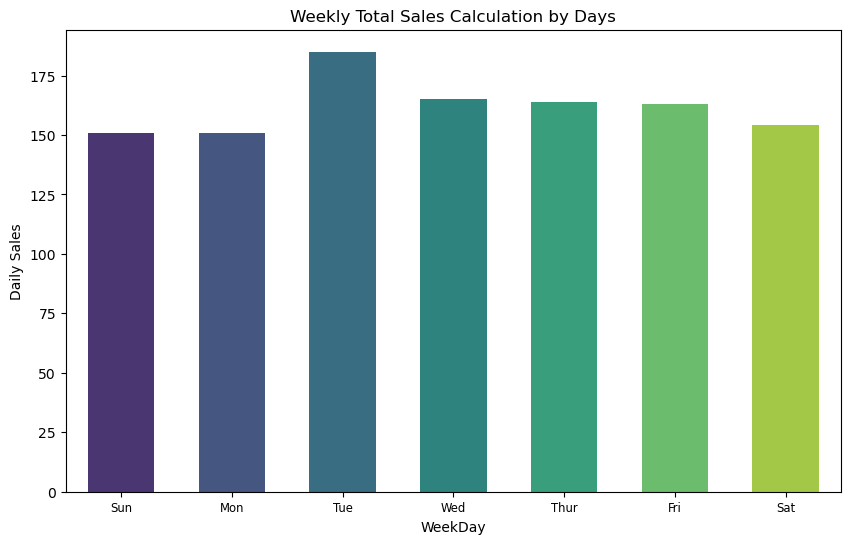

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(data=weekly_total_sales,x='day',y='Nit Sales Per Day', palette='viridis',hue = 'day',width = 0.6)
plt.xticks(range(len(weekly_total_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.title('Weekly Total Sales Calculation by Days')
plt.xlabel('WeekDay')
plt.ylabel('Daily Sales')

## Generate Hourly Sales broken by Coffee_name¶

In [58]:
Hourly_sales = (
    df_cleaed
    .groupby(['coffee_name','Hour'])
    .count()['date']
    .reset_index()
    .rename(columns = {'date':'Sales in Hour'})
    .pivot(index = 'Hour',columns = 'coffee_name',values='Sales in Hour')
    .reset_index()
)

Hourly_sales.head()

coffee_name,Hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5.0,4.0,1.0,NaN,1.0,NaN,NaN,2.0
1,8,10.0,7.0,8.0,1.0,6.0,NaN,NaN,12.0
2,9,8.0,16.0,6.0,1.0,5.0,3.0,NaN,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0


## Creating a Column Chart for Hourly Sales broken by Coffee_name

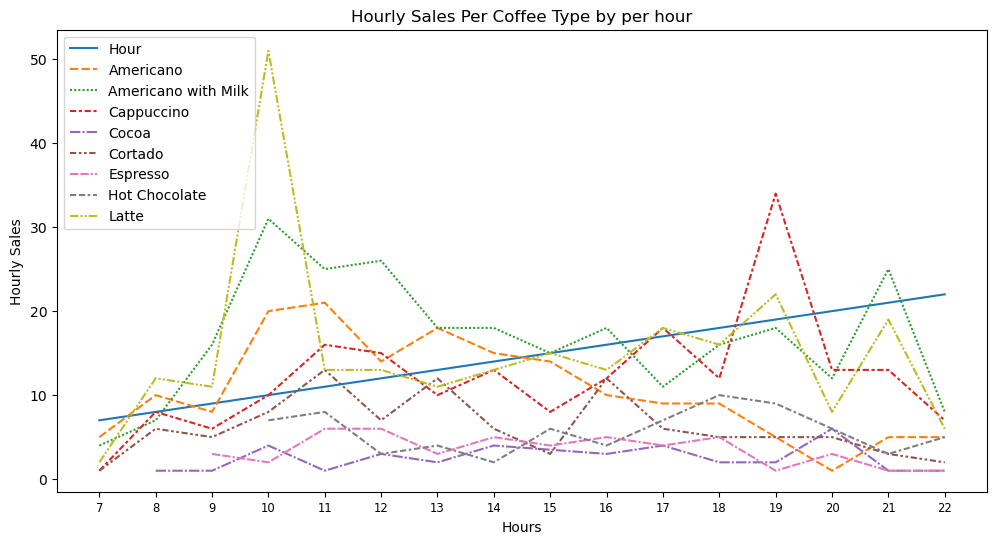

In [59]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Hourly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(Hourly_sales['Hour'])),Hourly_sales['Hour'],size='small')

plt.title('Hourly Sales Per Coffee Type by per hour')
plt.xlabel('Hours')
plt.ylabel('Hourly Sales')

plt.show()

## Generate Nit Hourly Sales

In [60]:
Nit_Hourly_sales = (
    df_cleaed
    .groupby(['Hour'])
    .count()['date']
    .reset_index()
    .rename(columns = {'date':'Sales in Hour'})
    .reset_index()
)

Nit_Hourly_sales.head()

,index,Hour,Sales in Hour
0,0,7,13
1,1,8,44
2,2,9,50
3,3,10,133
4,4,11,103


## Creating a Column Chart for Nit Hourly Sales

Text(0, 0.5, 'Sales in Hour')

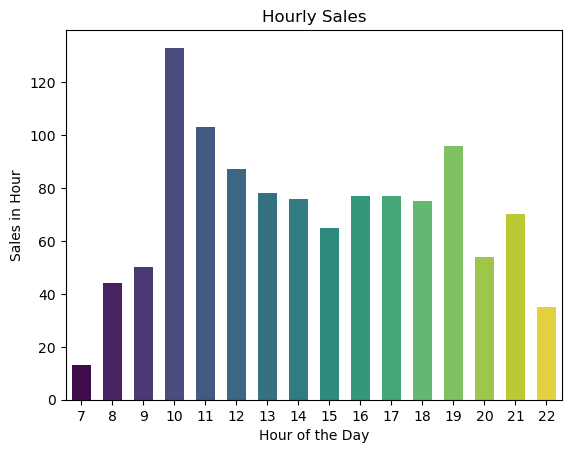

In [61]:
sns.barplot(data=Nit_Hourly_sales,x='Hour',y='Sales in Hour' ,palette='viridis',hue = 'Hour',width = 0.6)
plt.legend().remove()

plt.title('Hourly Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales in Hour')


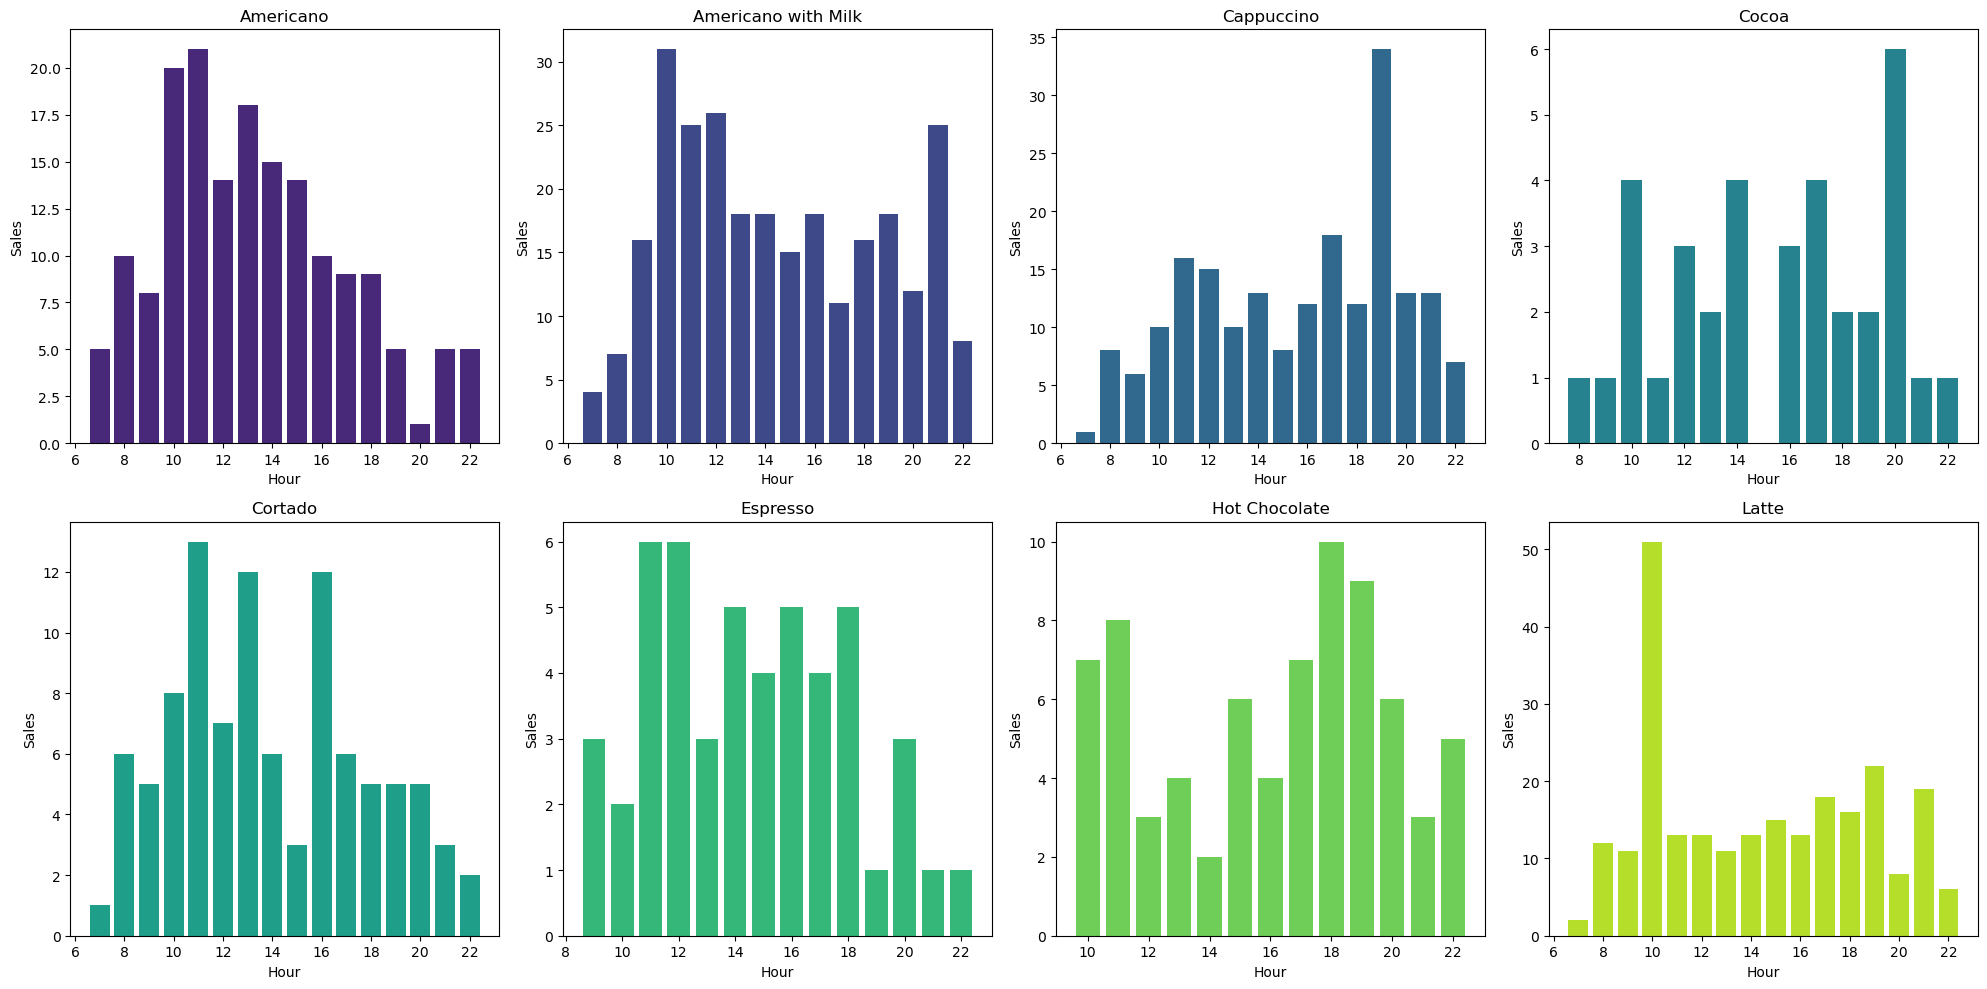

In [69]:
# Create a figure with a grid of 2 rows and 4 columns for subplots, with a specified size.
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration.
axs = axs.flatten()

# Generate a list of colors (one per subplot)
colors = sns.color_palette("viridis", len(Hourly_sales.columns) - 1)

# Loop through each column in the DataFrame, skipping the 'Index' column.
for i, column_name in enumerate(Hourly_sales.columns[1:]):  # Skip the first column ('Index')

    # Plot a bar chart for each coffee type in its respective subplot.
    axs[i].bar(Hourly_sales['Hour'], Hourly_sales[column_name],color=colors[i])

    axs[i].set_title(f'{column_name}')
    axs[i].set_xlabel('Hour')

    # Uncomment this if a y-axis label is needed for each subplot.
    axs[i].set_ylabel('Sales')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Display the figure
plt.show()


# Discussion and Conclusion

In this coffee sales data analysis project, I undertook a series of data processing and exploration tasks aimed at extracting insights and trends from the dataset.

1. **Data Import and Initial Processing**: I started by importing the raw coffee sales data and creating a copy for analysis. I conducted preliminary checks for metadata, missing values, and duplicate records to ensure the data’s accuracy.

2. **Data Cleaning**: Some columns, like the date, were found redundant and removed to streamline the dataset. I then focused on the `datetime` column, converting its data type to `datetime` format and extracting specific time-based features such as hour, month, year, and day, which added more dimensions to the dataset for detailed time-based analysis.

3. **Handling Missing Values**: For fields like `card` that contained missing values, I filled these gaps using the mode value of the column, ensuring a complete dataset for analysis.

4. **Categorical Analysis**: I examined categorical variables like `cash_type` and `coffee_name`. For coffee names, I calculated both the frequency and percentage of each type, identifying the most popular coffee products in terms of sales volume.

5. **Exploratory Data Analysis (EDA)**:
   - **Revenue Analysis**: I calculated revenue by coffee type to identify high-earning products. Visualizations, including bar charts, highlighted the revenue distribution across coffee types.
   - **Monthly and Weekly Sales Trends**: I grouped the data by `coffee_name` and `Month` to observe monthly sales trends for each coffee type. This approach was extended to weekly sales as well, where I visualized sales for each day of the week, helping to pinpoint peak days for sales.
   - **Hourly Sales Patterns**: I also analyzed sales by hour to understand peak sales times throughout the day.

6. **Data Visualization**: Various plots, such as bar charts and line graphs, were created to showcase monthly, weekly, and hourly sales trends across different coffee products, providing clear, visual insights into the sales patterns.

This project involved a structured approach to data analysis and visualization, yielding a detailed breakdown of coffee sales patterns by time, payment type, and product type. The insights derived could aid in strategic decisions regarding product offerings and promotional timings.